In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import seaborn as sns
from tabulate import tabulate

In [ ]:
# Charger les données d'entraînement et de test
train = pd.read_csv('/content/Train_data.csv')

In [ ]:
test = pd.read_csv('/content/Test_data.csv')

In [ ]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [ ]:
train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
train.describe(include='object')

,protocol_type,service,flag,class
count,25192,25192,25192,25192
unique,3,66,11,2
top,tcp,http,SF,normal
freq,20526,8003,14973,13449


In [ ]:
train.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [ ]:
total = train.shape[0]
missing_columns = [col for col in train.columns if train[col].isnull().sum() > 0]
for col in missing_columns:
    null_count = train[col].isnull().sum()
    per = (null_count/total) * 100
    print(f"{col}: {null_count} ({round(per, 3)}%)")

In [ ]:
print(f"Nombre de lignes dupliquées: {train.duplicated().sum()}")

Nombre de lignes dupliquées: 0


Répartition des classes dans l'ensemble d'entraînement:
class
normal     13449
anomaly    11743
Name: count, dtype: int64


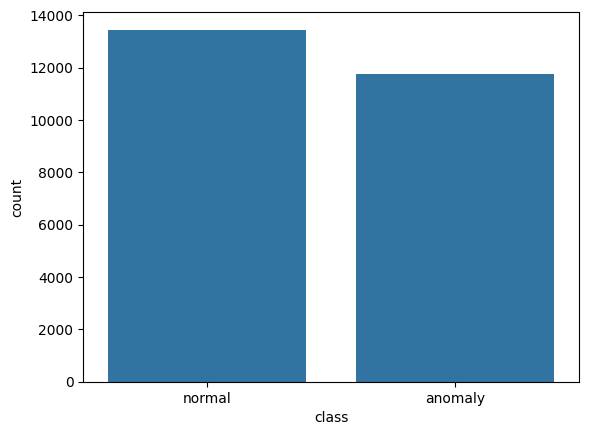

In [ ]:
#Visualiser la répartition des classes
sns.countplot(x=train['class'])
print("Répartition des classes dans l'ensemble d'entraînement:")
print(train['class'].value_counts())

In [ ]:
#Encodage des étiquettes
def le(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            label_encoder = LabelEncoder()
            df[col] = label_encoder.fit_transform(df[col])

In [ ]:
le(train)

In [ ]:
le(test)

In [ ]:
#Preparation des donnes
test.drop(['num_outbound_cmds'], axis=1, inplace=True)

In [ ]:
X_train = train.drop(['class'], axis=1)

In [ ]:
Y_train = train['class']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, train_size=0.70, random_state=2)

In [ ]:
#Entrainment de KNN
KNN_model = KNeighborsClassifier(n_neighbors=5)

In [ ]:
KNN_model.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
#Evaluation de modèle
KNN_train, KNN_test = KNN_model.score(x_train, y_train), KNN_model.score(x_test, y_test)

In [ ]:
print(f"Score d'entraînement: {KNN_train}")

Score d'entraînement: 0.9912101621866848


In [ ]:
print(f"Score de test: {KNN_test}")

Score de test: 0.9900767398782747


In [ ]:
#Affichage des scores du modèle
data = [["KNN", KNN_train, KNN_test]]

col_names = ["Modèle", "Score d'entraînement", "Score de test"]
print(tabulate(data, headers=col_names, tablefmt="fancy_grid"))

╒══════════╤════════════════════════╤═════════════════╕
│ Modèle   │   Score d'entraînement │   Score de test │
╞══════════╪════════════════════════╪═════════════════╡
│ KNN      │                0.99121 │        0.990077 │
╘══════════╧════════════════════════╧═════════════════╛


In [ ]:
#Cross-validation
#est une technique utilisée en apprentissage automatique pour évaluer
#dans quelle mesure un modèle entraîné se généralise à un ensemble de
#données indépendant.
SEED = 42
knn = KNeighborsClassifier()

In [ ]:
from sklearn.model_selection import cross_val_score
models = {}
models['KNeighborsClassifier']= knn

In [ ]:
scores = {}
for name in models:
  scores[name]={}
  for scorer in ['precision','recall']:
    scores[name][scorer] = cross_val_score(models[name], x_train, y_train, cv=10, scoring=scorer)

In [ ]:
# Affichage des résultats de cross-validation
def line(name):
  return '*'*(25-len(name)//2)

for name in models:
  print(line(name), name, 'Validation de modèle', line(name))

  for scorer in ['precision','recall']:
    mean = round(np.mean(scores[name][scorer])*100,2)
    stdev = round(np.std(scores[name][scorer])*100,2)
    print ("Mean {}:".format(scorer),"\n", mean,"%", "+-",stdev)
    print()

*************** KNeighborsClassifier Validation de modèle ***************
Mean precision: 
 98.77 % +- 0.31

Mean recall: 
 98.62 % +- 0.26



<Axes: >

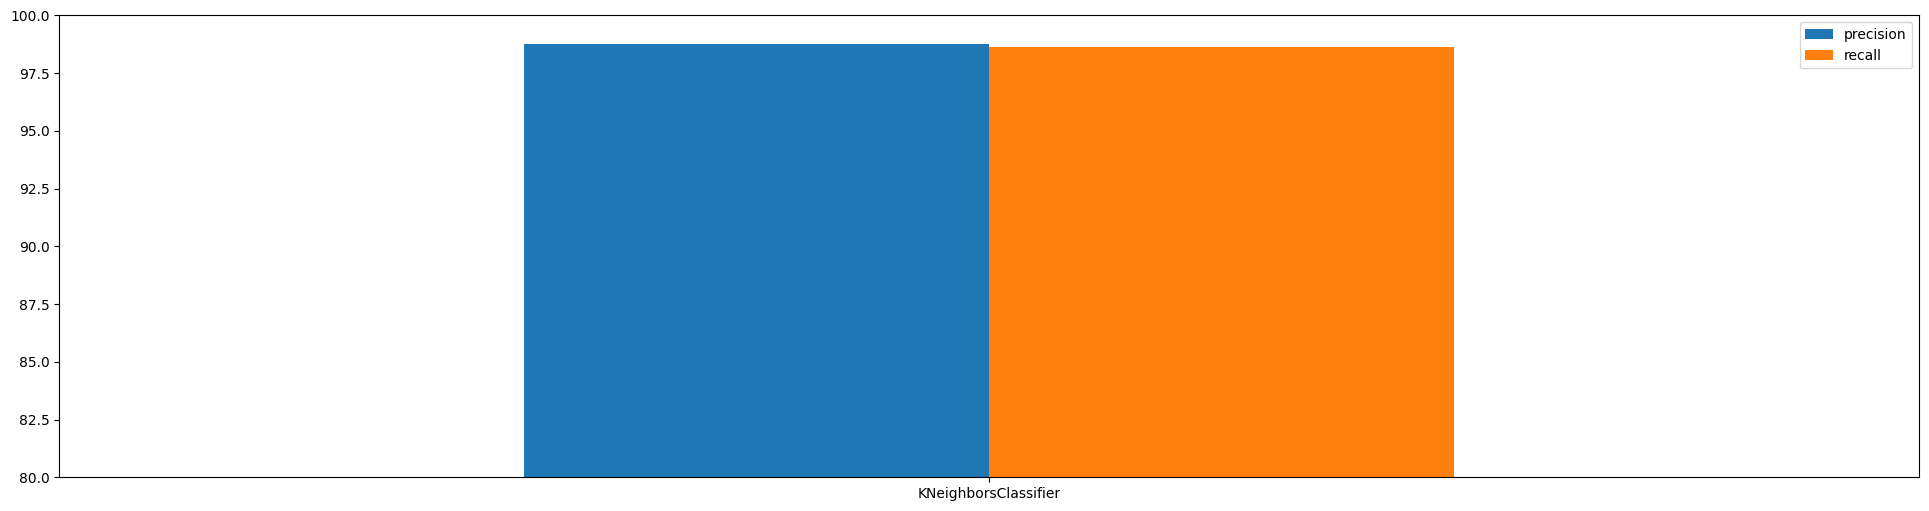

In [ ]:
#Tracer les scores de cross-validation
for name in models:
    for scorer in ['precision','recall']:
        scores[name][scorer] = scores[name][scorer].mean()
scores=pd.DataFrame(scores).swapaxes("index", "columns")*100
scores.plot(kind = "bar",  ylim=[80,100], figsize=(24,6), rot=0)

In [ ]:
#Prédictions du modèle
preds={}
for name in models:
    models[name].fit(x_train, y_train)
    preds[name] = models[name].predict(x_test)
print("Prédictions terminées.")

Prédictions terminées.


In [ ]:
#Evaluation du modèle
def line(name,sym="*"):
    return sym*(25-len(name)//2)
target_names=["normal","anamoly"]
for name in models:
    print(line(name), name, 'Test de modèle', line(name))
    print(confusion_matrix(y_test, preds[name]))
    print(line(name,'-'))
    print(classification_report(y_test, preds[name], target_names=target_names))

*************** KNeighborsClassifier Test de modèle ***************
[[3465   33]
 [  42 4018]]
---------------
              precision    recall  f1-score   support

      normal       0.99      0.99      0.99      3498
     anamoly       0.99      0.99      0.99      4060

    accuracy                           0.99      7558
   macro avg       0.99      0.99      0.99      7558
weighted avg       0.99      0.99      0.99      7558



<Axes: >

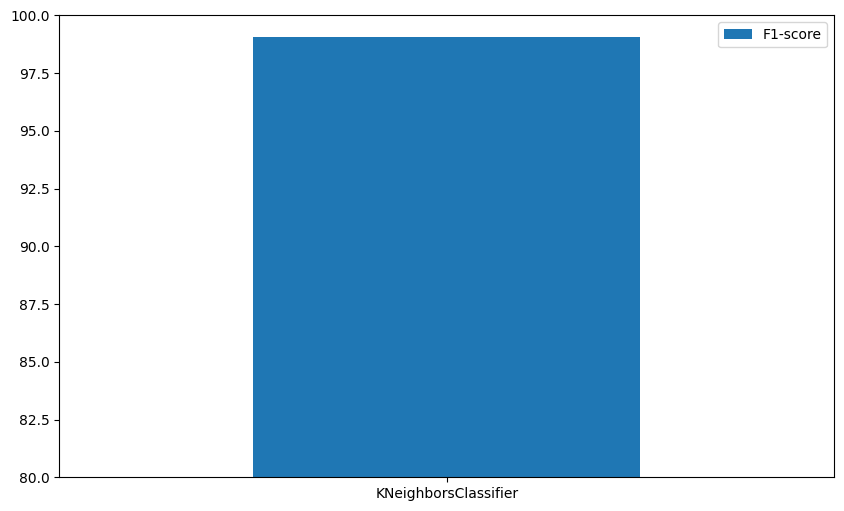

In [ ]:
#Tracer les scores de F1
f1s = {}
for name in models:
    f1s[name]=f1_score(y_test, preds[name])
f1s=pd.DataFrame(f1s.values(),index=f1s.keys(),columns=["F1-score"])*100
f1s.plot(kind = "bar",  ylim=[80,100], figsize=(10,6), rot=0)

In [ ]:
# Function to generate synthetic DoS attack data
def simulate_dos_attack_data(num_samples, feature_space):
    # Assuming 'feature_space' is a DataFrame of the normal traffic features
    # We will generate synthetic data by introducing anomalies that mimic a DoS attack
    dos_attack_data = feature_space.sample(n=num_samples, replace=True).copy()

    # Introduce anomalies in the data
    # For example, if 'duration' is a feature, we can increase it to simulate a DoS attack
    dos_attack_data['duration'] = np.random.randint(10, 1000, size=num_samples)

    # You can introduce other types of anomalies based on known DoS attack patterns
    # ...

    # Return the synthetic DoS attack data
    return dos_attack_data

# Number of DoS attack samples you want to simulate
num_dos_samples = 100

# Simulate DoS attack data
# Make sure to use the same features as your normal traffic data
dos_features = simulate_dos_attack_data(num_dos_samples, X_train)

# Create DoS attack labels (assuming '1' is the label for attack)
dos_labels = np.ones(num_dos_samples, dtype=int)

# Add the simulated DoS attack data to the test set
x_test = pd.concat([x_test, dos_features])
y_test = np.concatenate([y_test, dos_labels])

# Now you can use your trained KNN model to predict and evaluate on this updated test set
preds = KNN_model.predict(x_test)

# Evaluate the model with the simulated DoS attack data included
print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds, target_names=target_names))


[[3465   33]
 [ 140 4220]]
              precision    recall  f1-score   support

      normal       0.96      0.99      0.98      3498
     anamoly       0.99      0.97      0.98      4360

    accuracy                           0.98      7858
   macro avg       0.98      0.98      0.98      7858
weighted avg       0.98      0.98      0.98      7858



In [ ]:
# Function to generate synthetic IP Spoofing attack data
def simulate_ip_spoofing_attack_data(num_samples, feature_space):
    # Assuming 'feature_space' is a DataFrame of the normal traffic features
    # We will generate synthetic data by introducing anomalies that mimic an IP Spoofing attack
    ip_spoofing_attack_data = feature_space.sample(n=num_samples, replace=True).copy()

    # Introduce anomalies in the data
    # For example, if 'src_bytes' and 'dst_bytes' are features, we can manipulate them
    # to simulate the traffic of an IP Spoofing attack
    ip_spoofing_attack_data['src_bytes'] = np.random.randint(1000, 10000, size=num_samples)
    ip_spoofing_attack_data['dst_bytes'] = np.random.randint(1000, 10000, size=num_samples)

    # You can introduce other types of anomalies based on known IP Spoofing attack patterns
    # ...

    # Return the synthetic IP Spoofing attack data
    return ip_spoofing_attack_data

# Number of IP Spoofing attack samples you want to simulate
num_ip_spoofing_samples = 100

# Simulate IP Spoofing attack data
# Make sure to use the same features as your normal traffic data
ip_spoofing_features = simulate_ip_spoofing_attack_data(num_ip_spoofing_samples, X_train)

# Create IP Spoofing attack labels (assuming '1' is the label for attack)
ip_spoofing_labels = np.ones(num_ip_spoofing_samples, dtype=int)

# Add the simulated IP Spoofing attack data to the test set
x_test = pd.concat([x_test, ip_spoofing_features])
y_test = np.concatenate([y_test, ip_spoofing_labels])

# Now you can use your trained KNN model to predict and evaluate on this updated test set
preds = KNN_model.predict(x_test)

# Evaluate the model with the simulated IP Spoofing attack data included
print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds, target_names=target_names))


[[3465   33]
 [ 145 4315]]
              precision    recall  f1-score   support

      normal       0.96      0.99      0.97      3498
     anamoly       0.99      0.97      0.98      4460

    accuracy                           0.98      7958
   macro avg       0.98      0.98      0.98      7958
weighted avg       0.98      0.98      0.98      7958

